# Data Science Challenge

In [1]:
# If you'd like to install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [1]:
#Libraries
import pandas as pd, numpy as np
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Unique id
`Daily Time Spent on Site` | Consumer time spent on site (in minutes)
`Age` | Consumer age (in years)
`Area Income` | Avg. Income of geographical area of consumer (in US $$)
`Daily Internet Usage` | Avg. minutes a day consumer is on the internet
`Ad Topic Line` | Headline of the advertisement
`gender` | Gender of the consumer
`Country` | Country of consumer
`Timestamp` | Timestamp at which consumer clicked on Ad or closed window (YYYY-MM-DD HH:MM:SS)
`Clicked` | Whether a consumer clicked on the advert or not (0: No ,1: Yes)

## Data Wrangling & Visualization

In [2]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [3]:
data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked
0,1200,2016-01-01 02:52:10,80.67,34,58909.36,239.76,Seamless impactful info-mediaries,0,Portugal,0
1,1201,2016-01-01 03:35:35,68.01,25,68357.96,188.32,Ameliorated actuating workforce,1,Afghanistan,0
2,1202,2016-01-01 05:31:22,80.94,36,60803.00,239.94,Self-enabling local strategy,0,Bermuda,0
3,1203,2016-01-01 08:27:06,78.77,28,63497.62,211.83,Public-key intangible Graphical User Interface,0,Guam,0
4,1204,2016-01-01 15:14:24,36.56,29,42838.29,195.89,Team-oriented bi-directional secured line,0,Uganda,1


In [4]:
#Explore columns
data.columns

Index(['id', 'Timestamp', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'gender', 'Country',
       'Clicked'],
      dtype='object')

In [5]:
#Description
data.describe()

,id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,gender,Clicked
count,1000.000000,1000.000000,1000.000000,775.000000,1000.000000,1000.000000,1000.000000
mean,1699.500000,65.120650,35.816000,55343.014555,179.592310,0.474000,0.503000
std,288.819436,15.781456,8.782669,13182.578667,43.735785,0.499573,0.500241
min,1200.000000,32.600000,19.000000,14548.060000,105.000000,0.000000,0.000000
25%,1449.750000,51.450000,29.000000,48270.620000,137.885000,0.000000,0.000000
50%,1699.500000,68.390000,35.000000,57737.510000,182.425000,0.000000,1.000000
75%,1949.250000,78.572500,41.250000,65207.185000,217.707500,1.000000,1.000000
max,2199.000000,91.370000,61.000000,79484.800000,269.960000,1.000000,1.000000


## Visualization, Modeling, Machine Learning

Predict which users might click a particular advertisement.
Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model's performance will be evaluated on the basis of accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [6]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country
0,2200,2016-06-04 17:24:07,43.88,54,31523.09,166.85,Enhanced methodical database,1,Somalia
1,2201,2016-06-05 00:29:13,66.40,40,77567.85,214.42,Digitized heuristic solution,0,Antigua and Barbuda
2,2202,2016-06-05 00:29:13,79.52,34,NaN,141.58,Customer-focused 24/7 concept,0,United States of America
3,2203,2016-06-05 07:54:30,52.35,25,33293.78,147.61,Mandatory 4thgeneration structure,1,Mali
4,2204,2016-06-05 07:54:30,81.51,36,NaN,195.93,Monitored local Internet solution,0,Croatia




**Describe the most important features in the model to a management audience.**

> #### Task:
- **Visualize the top 10 features and their feature importance.**


# Data Analyse & Preprocessing :

In [7]:
global k
global ctry_dict
ctry_dict={}
k=0
def country_to_int(row):
    global k
    global ctry_dict
    country=row['Country']
    if country not in ctry_dict:
        ctry_dict[country]=k
        k+=1
    return(ctry_dict[country])
    
     

In [8]:
def df_country_int(df:pd.DataFrame):
    global k
    global ctry_dict
    df['Country_int']=df.apply(country_to_int,axis=1)
    return(df) 

In [9]:
%%time
data_new=data.copy()
df_country_int(data_new).head()

CPU times: user 11 ms, sys: 0 ns, total: 11 ms
Wall time: 11.3 ms


,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked,Country_int
0,1200,2016-01-01 02:52:10,80.67,34,58909.36,239.76,Seamless impactful info-mediaries,0,Portugal,0,0
1,1201,2016-01-01 03:35:35,68.01,25,68357.96,188.32,Ameliorated actuating workforce,1,Afghanistan,0,1
2,1202,2016-01-01 05:31:22,80.94,36,60803.00,239.94,Self-enabling local strategy,0,Bermuda,0,2
3,1203,2016-01-01 08:27:06,78.77,28,63497.62,211.83,Public-key intangible Graphical User Interface,0,Guam,0,3
4,1204,2016-01-01 15:14:24,36.56,29,42838.29,195.89,Team-oriented bi-directional secured line,0,Uganda,1,4


In [97]:

#transform each timestamp to multiple columns of integers
import numpy as np
import re
from matplotlib import pyplot as plt
import matplotlib
def timestamps_to_array(timestamp):
    #timestamp=df['Timestamp']
    time_list=re.split(r'\D+',timestamp)
    Year=int(time_list[0])
    Month=int(time_list[1])
    Day=int(time_list[2])
    Hour=int(time_list[3])
    return(Year,Month,Day,Hour)


In [14]:
def df_timestamps(df:pd.DataFrame):
    df['Year'],df['Month'],df['Day'],df['Hour']=zip(*df['Timestamp'].map(timestamps_to_array))
    return(df)

In [15]:
%%time
data_new=df_timestamps(data_new)
print(data_new[['Year', 'Month', 'Day', 'Hour']].head())

   Year  Month  Day  Hour
0  2016      1    1     2
1  2016      1    1     3
2  2016      1    1     5
3  2016      1    1     8
4  2016      1    1    15
CPU times: user 9.14 ms, sys: 1.26 ms, total: 10.4 ms
Wall time: 9.3 ms


In [62]:
data_hist=data_new[data.Clicked!=0]

**=>** We can remark that there is only one year in the dataset therefore the number of clicks per year is a single bar , and also the number of clicks per month is almost constant , however we have a drop for the last month "6" , we can conclude that this drop is due to the low number of data elements with a 'month==6'. Also we remark fluctuations of number of clicks when it comes to the feature of Days and hours.

**As to conclude, we can only take the day as well as the hour in which the Ad is seen and drop the rest of the time stamp.**

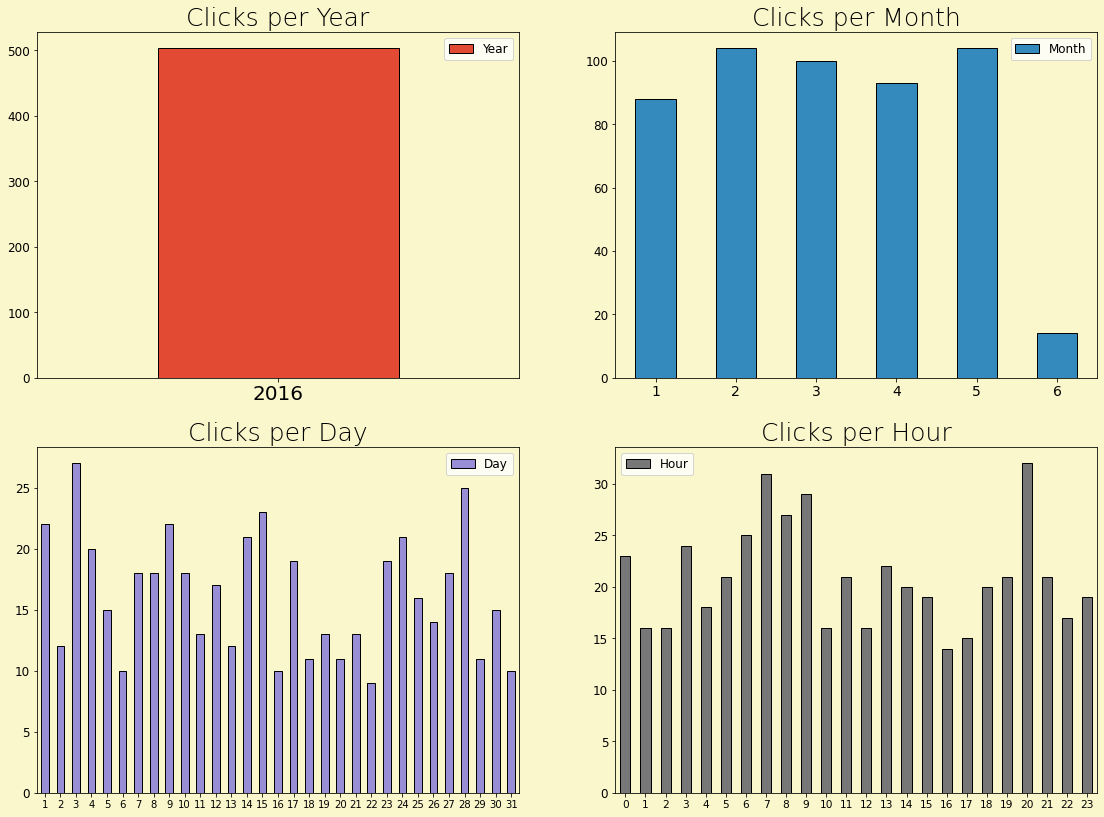

CPU times: user 611 ms, sys: 12 ms, total: 623 ms
Wall time: 621 ms


In [217]:
%%time

fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (19, 14),facecolor='#FAF7CC')
colors = ["#e24a33", "#348abd", "#988ed5", "#777777"]

for index, column in enumerate(['Year','Month','Day','Hour']):
    df_col=data_hist[column].value_counts().sort_index()
    unique=df_col.index
    ax = axes.flatten()[index]
    ax.set_facecolor('#FAF7CC')
    
    df_col.plot.bar(ax=ax, color = colors[index], label = column,align = 'center',edgecolor = 'k',rot=0)
    ax.set_title('Clicks per '+column,fontsize =25)
    ax.legend(loc = "best",prop={"size":12})
    ax.set_xticklabels(unique,fontsize=20/(len(unique))**0.2)
    
    
plt.show()


In [189]:
data_hist['Day'].value_counts().sort_index().index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

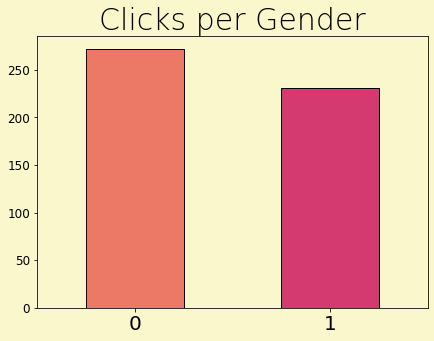

CPU times: user 90 ms, sys: 39 µs, total: 90 ms
Wall time: 87.6 ms


In [226]:
%%time

fig, axes = plt.subplots(nrows = 1, ncols =1, figsize = (19, 14),facecolor='#FAF7CC')
axes.set_facecolor('#FAF7CC')

gender=data_hist['gender']
gender.value_counts().plot.bar(figsize=(7,5),grid=False,align="center",color=['#EB7965','#D4396F'],edgecolor='k',rot=0)
plt.title('Clicks per Gender',fontsize=30)
plt.xticks([0,1],fontsize=20)
plt.show()

**We can remark that there is a small difference when it comes to the number of clicks between the genders , therefore we decide to create two models, one which keeps the Gender Feature and one which drops it**

# Embedding the Ad Topic lines using Doc2Vec :

**Now using the Doc2Vec model from gensim we will try to embed the text in 'Ad Topic Line' feature into a vector of floats**

In [238]:
#!pip install nltk
#!pip install gensim

In [239]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to /home/dhiab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [240]:
sentences=data['Ad Topic Line'].tolist()
tok_sent = []
for s in sentences:
    tok_sent.append(word_tokenize(s.lower()))


In [241]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tok_sent)]

In [242]:
model = Doc2Vec(tagged_data, vector_size = 5, window = 2, min_count = 1, epochs = 1000)

In [25]:
sentence_example=data['Ad Topic Line'][0]

print('sentence example:')
print(sentence_example)
print('-'*100)
test_doc = word_tokenize(sentence_example.lower())
test_doc_vector = model.infer_vector(test_doc)



print('Most similar title:')
print(sentences[model.docvecs.most_similar(positive = [test_doc_vector])[2][0]])

sentence example:
Seamless impactful info-mediaries
----------------------------------------------------------------------------------------------------
Most similar title:
Networked regional Local Area Network


<ipython-input-25-63ce96106884>:12: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  print(sentences[model.docvecs.most_similar(positive = [test_doc_vector])[2][0]])


In [26]:
def topic_to_array(df: pd.DataFrame):
    topic_list=[]
    for _,row in df.iterrows():
        topic_vector=model.infer_vector(word_tokenize(row['Ad Topic Line'].lower()))
        topic_list.append(topic_vector)
    return(np.array(topic_list))

In [27]:
topic_array=topic_to_array(data)

**When it comes the Nan values in the 'Area Income' column , we decided to  replace the Nan value with the Average value of 'Area Income'**

In [28]:
m=np.mean(data.dropna()['Area Income'].to_numpy())
data_avg=data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','gender']].fillna(m)
print(data_avg)

     Daily Time Spent on Site  Age   Area Income  Daily Internet Usage  gender
0                       80.67   34  58909.360000                239.76       0
1                       68.01   25  68357.960000                188.32       1
2                       80.94   36  60803.000000                239.94       0
3                       78.77   28  63497.620000                211.83       0
4                       36.56   29  42838.290000                195.89       0
..                        ...  ...           ...                   ...     ...
995                     82.12   54  55343.014555                132.66       1
996                     45.01   26  29875.800000                178.35       0
997                     36.62   36  55343.014555                163.00       0
998                     80.46   29  56909.300000                230.78       0
999                     81.98   34  67432.490000                212.88       0

[1000 rows x 5 columns]


# Getting the Features Vectors 'X' and the Target Vectors 'Y' :

In [211]:
X1=np.concatenate([data_avg.to_numpy(),topic_array,timestamp_array[:,2:4],ctry_array],axis=1)
print(X1.shape)
data_avg_no_gender=data_avg[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]
X2=np.concatenate([data_avg_no_gender.to_numpy(),topic_array,timestamp_array[:,2:4],ctry_array],axis=1)
print(X2.shape)
Y=data['Clicked'].to_numpy()
print(Y.shape)

(1000, 13)
(1000, 12)
(1000,)


# Using SVM from sklearn and Hold-out validation for model Assesment :

In [212]:
def stand(X1,X):
    
    x_mean=np.mean(X1,axis=0)


    x_std=np.std(X1,axis=0)

    X_new=(X-x_mean)/x_std
    return(X_new)

In [213]:
X1_std=stand(X1,X1)
X2_std=stand(X2,X2)

In [166]:
#split first data to train and validation
from sklearn.model_selection import train_test_split
X_train1, X_val1, Y_train1, Y_val1 = train_test_split(X1_std, Y, test_size=0.33, random_state=40)

In [167]:
#split second data to train and validation
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X2_std, Y, test_size=0.33, random_state=40)

In [168]:
from sklearn import svm
model_click11 = svm.SVC(kernel='linear')
model_click11.fit(X_train1, Y_train1)

SVC(kernel='linear')

In [169]:
model_click12 = svm.SVC(C=19e-1,gamma=13e-2,kernel='rbf')
model_click12.fit(X_train1, Y_train1)

SVC(C=1.9, gamma=0.13)

In [170]:
model_click21 = svm.SVC(kernel='linear')
model_click21.fit(X_train2, Y_train2)

SVC(kernel='linear')

In [171]:
from sklearn.neighbors import KNeighborsClassifier
model_click22 =  KNeighborsClassifier(n_neighbors=5)
model_click22.fit(X_train2, Y_train2)

KNeighborsClassifier()

In [172]:
def accuracy(model,X_val,Y_val):
    acc=(model.predict(X_val)==Y_val).mean()
    
    return(acc)

In [173]:
print(f'first model with SVM linear kernel accuracy on train set : {accuracy(model_click11,X_train1,Y_train1):.2f}')
print('-'*100)
print(f'first model with SVM linear kernel accuracy on validation set : {accuracy(model_click11,X_val1,Y_val1):.2f}')

first model with SVM linear kernel accuracy on train set : 0.86
----------------------------------------------------------------------------------------------------
first model with SVM linear kernel accuracy on validation set : 0.85


In [174]:
print(f'second model with SVM linear kernel accuracy on train set : {accuracy(model_click21,X_train2,Y_train2):.2f}')
print('-'*100)
print(f'second model with SVM linear kernel accuracy on validation set : {accuracy(model_click21,X_val2,Y_val2):.2f}')

second model with SVM linear kernel accuracy on train set : 0.87
----------------------------------------------------------------------------------------------------
second model with SVM linear kernel accuracy on validation set : 0.85


In [175]:
print(f'first model with SVM rbf kernel accuracy on train set : {accuracy(model_click12,X_train1,Y_train1):.2f}')
print('-'*100)
print(f'first model with SVM rbf kernel accuracy on validation set : {accuracy(model_click12,X_val1,Y_val1):.2f}')

first model with SVM rbf kernel accuracy on train set : 0.96
----------------------------------------------------------------------------------------------------
first model with SVM rbf kernel accuracy on validation set : 0.85


In [176]:
print(f'second model with KNN method accuracy on train set : {accuracy(model_click22,X_train2,Y_train2):.2f}')
print('-'*100)
print(f'second model with KNN method accuracy on validation set : {accuracy(model_click22,X_val2,Y_val2):.2f}')

second model with KNN method accuracy on train set : 0.88
----------------------------------------------------------------------------------------------------
second model with KNN method accuracy on validation set : 0.84


**the first model with SVM rbf kernel performs best on validation set therefore we will train it on the whole dataset and test it on the test set**

In [195]:
model_final = svm.SVC(C=19e-1,gamma=13e-2,kernel='rbf')
model_final.fit(X1_std, Y)

SVC(C=1.9, gamma=0.13)

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict whether a consumer clicked on an ad or not. Submit a CSV file with a header row and one row per test entry. 
    
The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **Clicked**

In [197]:
ctry_array_test=country_to_array(test_data)
ctry_array_test=ctry_array_test.reshape((ctry_array_test.shape[0],1))
print(ctry_array_test.shape)

(300, 1)


In [198]:
topic_array_test=topic_to_array(test_data)
print(topic_array_test.shape)

(300, 5)


In [181]:
timestamp_array_test=timestamp_to_array(test_data)
timestamp_array_test.shape

(300, 6)

In [199]:
m=np.mean(test_data.dropna()['Area Income'].to_numpy())
data_avg_test=test_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','gender']].fillna(m)
print(data_avg_test)

     Daily Time Spent on Site  Age   Area Income  Daily Internet Usage  gender
0                       43.88   54  31523.090000                166.85       1
1                       66.40   40  77567.850000                214.42       0
2                       79.52   34  53818.505778                141.58       0
3                       52.35   25  33293.780000                147.61       1
4                       81.51   36  53818.505778                195.93       0
..                        ...  ...           ...                   ...     ...
295                     74.06   23  40345.490000                225.99       0
296                     61.88   42  60223.520000                112.19       1
297                     80.03   44  24030.060000                150.84       0
298                     86.38   33  53818.505778                233.60       0
299                     69.15   46  36424.940000                112.72       0

[300 rows x 5 columns]


In [217]:
X_test=np.concatenate([data_avg_test.to_numpy(),topic_array_test,timestamp_array_test[:,2:4],ctry_array_test],axis=1)
X_test_std=stand(X1,X_test)
print(X_test_std.shape)

(300, 13)


In [218]:
Y_test=model_final.predict(X_test_std)

In [219]:
dict_test['id']=test_data['id'].to_list()
dict_test['Clicked']=list(Y_test)

In [220]:
submission_df=pd.DataFrame.from_dict(dict_test)
print(submission_df)

       id  Clicked
0    2200        1
1    2201        0
2    2202        0
3    2203        1
4    2204        0
..    ...      ...
295  2495        0
296  2496        1
297  2497        1
298  2498        0
299  2499        1

[300 rows x 2 columns]


In [221]:
#Submission
submission_df.to_csv('submissions_v2.csv',index=False)

---